## PART 1: Data Processing

#### Load data

In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
mrkt_df = pd.read_csv('/Users/anish/OneDrive - Dickinson College/Documents/GitHub/DATA300-Group-Project/marketing_campaign.csv', sep=',')

In [13]:
#mrkt_df = pd.read_csv('/Users/tu/Library/CloudStorage/OneDrive-DickinsonCollege/Junior/SPRING25/DATA300/Group-Project/marketing_campaign.csv', sep=',')

In [5]:
mrkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Cleaning the dataset

In [7]:
print("Dimension of the data: ", mrkt_df.shape)
no_of_rows = mrkt_df.shape[0]
no_of_columns = mrkt_df.shape[1]
print(f'No. of Rows: {no_of_rows}')
print(f'No. of Columns: {no_of_columns}')

Dimension of the data:  (2240, 29)
No. of Rows: 2240
No. of Columns: 29


In [20]:
#check income column
mrkt_df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [11]:
# Write a function to count NA cells in income column
def NaCount(dataFrame, columnName):
   count = dataFrame[columnName].isna().sum()
   return count
count = NaCount(mrkt_df, 'Income')
print(f'Number of missing values in Income Column: {count}')

Number of missing values in Income Column: 24


In [13]:
#dropping the missing value rows
mrkt_df = mrkt_df.dropna(subset=['Income'])

#### Normalizing income variable

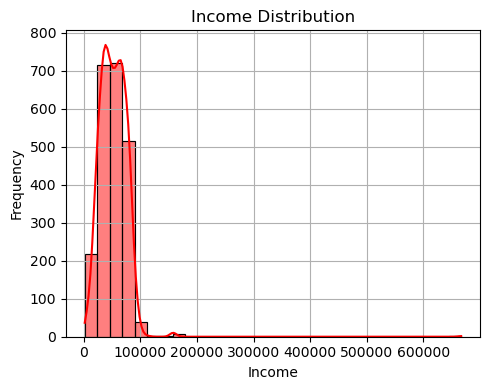

In [16]:
#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income'], kde=True, bins=30, color='red', edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

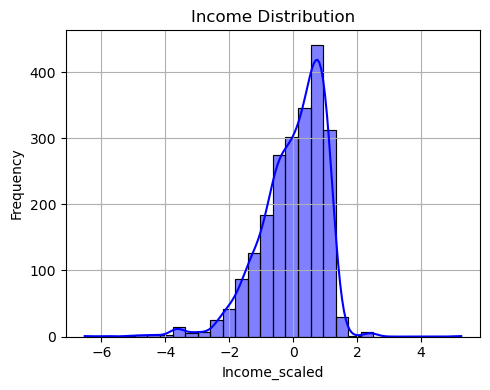

In [17]:
#since histogram appears right-skewed, we use log transformation to normalize the income
mrkt_df['Income_log'] = np.log1p(mrkt_df['Income'])
#standardize
scaler = StandardScaler()
mrkt_df['Income_scaled'] = scaler.fit_transform(mrkt_df[['Income_log']])

#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income_scaled'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income_scaled')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Disproportion in the number of observations that response Yes and No shows the need to apply resampling to reduce the imbalance result.

In [19]:
#Convert Dt_Customer to date column
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'], format="%d-%m-%Y")

In [20]:
mrkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_log,Income_scaled
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,10.970592,0.428623
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,10.743869,-0.019686
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,11.179046,0.840808
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,10.190432,-1.114019
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,10.973254,0.433888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,11.022295,0.530857
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,11.066873,0.619003
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,10.950491,0.388876
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,11.145421,0.774319


#### Only Numerical Dataset

In [23]:
num_df = mrkt_df[['Year_Birth', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Income_scaled','Response']]
num_df

,Year_Birth,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income_scaled,Response
0,1957,58,635,88,546,172,88,88,3,8,10,4,7,0.428623,1
1,1954,38,11,1,6,2,1,6,2,1,1,2,5,-0.019686,0
2,1965,26,426,49,127,111,21,42,1,8,2,10,4,0.840808,0
3,1984,26,11,4,20,10,3,5,2,2,0,4,6,-1.114019,0
4,1981,94,173,43,118,46,27,15,5,5,3,6,5,0.433888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,46,709,43,182,42,118,247,2,9,3,4,5,0.530857,0
2236,1946,56,406,0,30,0,0,8,7,8,2,5,7,0.619003,0
2237,1981,91,908,48,217,32,12,24,1,2,3,13,6,0.388876,0
2238,1956,8,428,30,214,80,30,61,2,6,5,10,3,0.774319,0


#### Encoding categorical variables

In [27]:
#list of categorical values
category_cols = mrkt_df.select_dtypes(include='object').columns
print("Categorical columns:\n", category_cols)

Categorical columns:
 Index(['Education', 'Marital_Status'], dtype='object')


In [30]:
#Label Encoding: Education (since its ordinal)
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
mrkt_df['Education_encoded'] = mrkt_df['Education'].astype(pd.CategoricalDtype(categories=education_order, ordered=True)).cat.codes

In [33]:
#Marital Status: Group some strange categories together
mrkt_df['Marital_Status_Clean'] = mrkt_df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Other',
    'Widow': 'Other'
})

In [35]:
#One-Hot Encoding for marital status
marital_dummies = pd.get_dummies(mrkt_df['Marital_Status_Clean'], prefix='Marital', dtype=int)
mrkt_df = pd.concat([mrkt_df, marital_dummies], axis=1)


In [37]:
mrkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Income_log,Income_scaled,Education_encoded,Marital_Status_Clean,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,10.970592,0.428623,2,Single,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,10.743869,-0.019686,2,Single,0,0,0,1,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,11.179046,0.840808,2,Together,0,0,0,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,10.190432,-1.114019,2,Together,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,10.973254,0.433888,4,Married,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,11.022295,0.530857,2,Married,0,1,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,11.066873,0.619003,4,Together,0,0,0,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,10.950491,0.388876,2,Divorced,1,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,11.145421,0.774319,3,Together,0,0,0,0,1


In [39]:
#Numerical columns only
category = mrkt_df.drop(['Education', 'Marital_Status', 'Income','Dt_Customer','Income_log','Marital_Status_Clean','Z_CostContact',
                         'Z_Revenue','Year_Birth', 'Recency', 'MntWines',
                         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'Income_scaled', 'ID'], axis=1)
category

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
2236,2,1,0,0,0,1,0,0,0,4,0,0,0,0,1
2237,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0
2238,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1


## Part 2: Feature Selection

In this project, we want our features to be our customers' information (income, purchasing history, etc).

#### Check for correlation numerical

In [44]:
most_correlated_num = num_df.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated_num)


Most Correlated Features:

Response               1.000000
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
Recency                0.199766
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income_scaled          0.127392
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
NumWebVisitsMonth      0.002209
Name: Response, dtype: float64


#### Correlation for category 

In [47]:
most_correlated_cat = category.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated_cat)

Most Correlated Features:

Response             1.000000
AcceptedCmp5         0.323374
AcceptedCmp1         0.297345
AcceptedCmp3         0.254005
AcceptedCmp4         0.180205
AcceptedCmp2         0.169294
Teenhome             0.153901
Marital_Single       0.112148
Education_encoded    0.099150
Marital_Married      0.079821
Kidhome              0.077909
Marital_Together     0.075293
Marital_Divorced     0.054189
Marital_Other        0.049881
Complain             0.002029
Name: Response, dtype: float64


In [49]:
# combine categorical and numerical dataset
category

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
2236,2,1,0,0,0,1,0,0,0,4,0,0,0,0,1
2237,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0
2238,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1


In [51]:
mrkt_df = mrkt_df.drop(['Marital_Status', 'Education', 'Dt_Customer', 'Marital_Status_Clean'], axis = 1)

In [53]:
#Shuffled dataset
shuffle_df = mrkt_df.sample(frac=1,random_state=42).reset_index(drop=True)
shuffle_df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_Revenue,Response,Income_log,Income_scaled,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,3635,1962,52597.0,0,1,69,492,0,37,7,...,11,0,10.870433,0.230575,4,0,0,0,1,0
1,3726,1986,34320.0,1,0,66,4,1,9,3,...,11,0,10.443513,-0.613592,4,0,0,0,0,1
2,9080,1972,38578.0,1,1,2,38,4,22,3,...,11,0,10.560463,-0.382341,4,0,0,0,1,0
3,8746,1989,75433.0,1,0,28,800,0,297,0,...,11,0,11.231013,0.943565,2,0,1,0,0,0
4,8079,1982,22448.0,1,0,86,3,1,8,23,...,11,0,10.019001,-1.452996,2,0,1,0,0,0


In [54]:
shuffle_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Income_log', 'Income_scaled',
       'Education_encoded', 'Marital_Divorced', 'Marital_Married',
       'Marital_Other', 'Marital_Single', 'Marital_Together'],
      dtype='object')

#### Assign features and target variable

In [58]:
X = shuffle_df.drop(columns=['ID','Response','Income', 'Income_log','NumStorePurchases', 'Year_Birth', 'NumDealsPurchases', 'NumWebVisitsMonth', "Complain", "Marital_Other", "Marital_Divorced"])
y = shuffle_df['Response'].to_numpy().reshape(-1,1)

In [60]:
pd.DataFrame(X)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Income_scaled,Education_encoded,Marital_Married,Marital_Single,Marital_Together
0,0,1,69,492,0,37,7,0,42,6,...,0,0,0,3,11,0.230575,4,0,1,0
1,1,0,66,4,1,9,3,0,0,1,...,0,0,0,3,11,-0.613592,4,0,0,1
2,1,1,2,38,4,22,3,3,3,3,...,0,0,0,3,11,-0.382341,4,0,1,0
3,1,0,28,800,0,297,0,34,57,2,...,0,1,0,3,11,0.943565,2,1,0,0
4,1,0,86,3,1,8,23,2,18,2,...,0,0,0,3,11,-1.452996,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1,0,77,30,5,23,4,1,4,2,...,0,0,0,3,11,-0.544302,3,0,1,0
2212,1,0,17,391,32,70,21,32,16,6,...,0,0,0,3,11,0.663262,1,1,0,0
2213,0,1,76,56,0,12,0,0,18,2,...,0,0,0,3,11,-0.666195,4,0,1,0
2214,0,0,43,1142,29,249,38,29,14,5,...,1,0,0,3,11,1.085603,4,1,0,0


## Part 3: Modelling

### Splitting dataset into training set

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Get feature column names to reattach after split
feature_cols = shuffle_df.drop(columns=[
   'ID', 'Response', 'NumStorePurchases','Income' ,'Income_log','Year_Birth', 'NumDealsPurchases','NumWebVisitsMonth', "Complain", "Marital_Other", "Marital_Divorced"]).columns

train_df = pd.DataFrame(X_train, columns=feature_cols)
train_df['Response'] = y_train

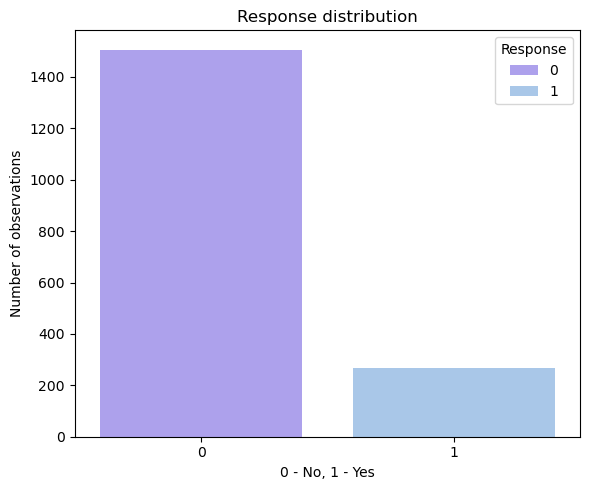

In [160]:
train_df.groupby('Response')
colors = [ '#A594F9', '#9EC6F3']
plt.figure(figsize=(6, 5))
sns.countplot(data=train_df, x='Response',  hue='Response', palette=colors)
plt.title('Response distribution')
plt.ylabel('Number of observations')
plt.xlabel('0 - No, 1 - Yes')
plt.tight_layout()
plt.show()

Bar graph shows imbalance in distribution of response variables therefore resampling is required. Method used: Oversampling

In [68]:
#majority and minority classes
majority_class = train_df[train_df['Response'] == 0]
minority_class = train_df[train_df['Response'] == 1]

#Oversample the minority class
minority_upsampled = resample(
    minority_class,
    replace=True,              
    n_samples=len(majority_class), #Match number of majority class
    random_state=42
)
#Combine back into a balanced training set 
train_upsampled = pd.concat([majority_class, minority_upsampled])
train_upsampled = train_upsampled.sample(frac=1, random_state=42)  # Shuffle

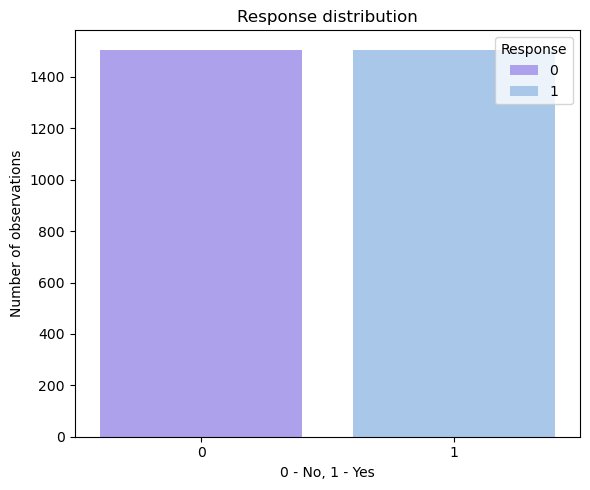

In [162]:
train_upsampled.groupby('Response')

plt.figure(figsize=(6, 5))
sns.countplot(data=train_upsampled, x='Response',  hue='Response', palette=colors)
plt.title('Response distribution')
plt.ylabel('Number of observations')
plt.xlabel('0 - No, 1 - Yes')
plt.tight_layout()
plt.show()

In [72]:
#Split X and y for model training
X_train_balanced = train_upsampled.drop(columns=['Response'])
y_train_balanced = train_upsampled['Response'].to_numpy().reshape(-1, 1).ravel()

## Feature Selection

#### - Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

In [78]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8783783783783784
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       377
           1       0.69      0.36      0.47        67

    accuracy                           0.88       444
   macro avg       0.79      0.66      0.70       444
weighted avg       0.86      0.88      0.86       444



In [79]:
#plot metrics

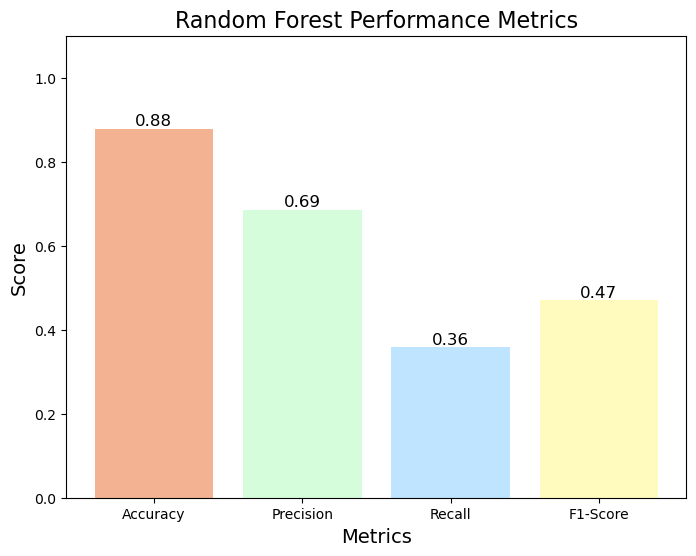

{'Accuracy': 0.8783783783783784, 'Precision': 0.6857142857142857, 'Recall': 0.3582089552238806, 'F1-Score': 0.47058823529411764}


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Create a metrics dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
# Define colors for the bars
colors = ['#f3b393', '#D5FDDB', '#BFE4FF', '#FFFBBF']

# Bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=colors)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Random Forest Performance Metrics', fontsize=16)

# Add score labels on bars
for bar, value in zip(bars, metrics.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1.1)
plt.show()

# Print the metric values
print(metrics)

### Hypertuning: Random Forest

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
baseline_accuracy = accuracy_score(y_test, y_pred_rf)
baseline_precision = precision_score(y_test, y_pred_rf)
baseline_recall = recall_score(y_test, y_pred_rf)
baseline_f1 = f1_score(y_test, y_pred_rf)

In [88]:
#grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define base model and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_balanced, y_train_balanced.ravel())

# Best model & prediction
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", best_rf.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8828828828828829
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       377
           1       0.68      0.42      0.52        67

    accuracy                           0.88       444
   macro avg       0.79      0.69      0.73       444
weighted avg       0.87      0.88      0.87       444



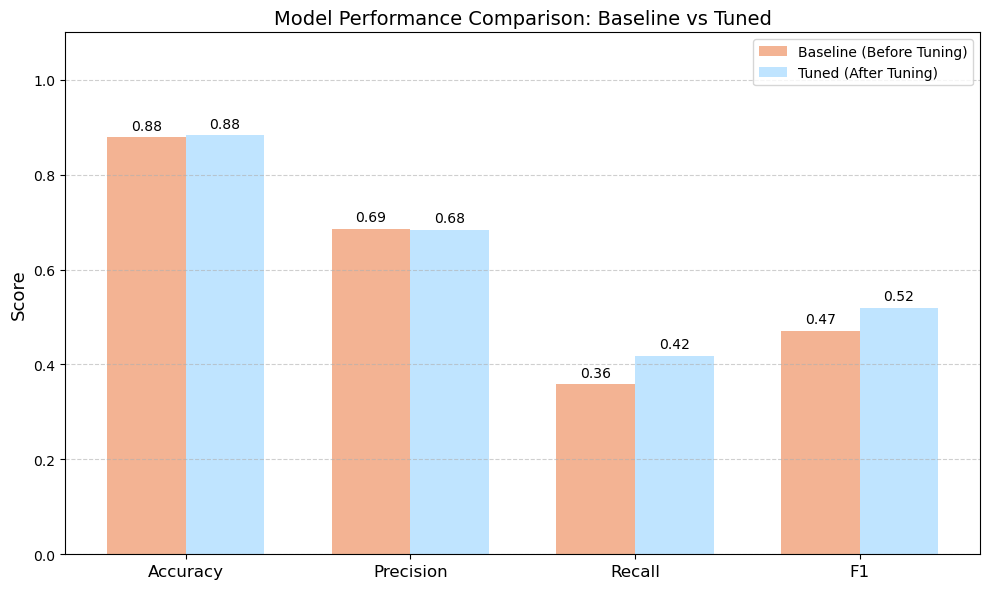

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use your tuned model's metrics
tuned_accuracy = accuracy_score(y_test, y_pred_rf)
tuned_precision = precision_score(y_test, y_pred_rf)
tuned_recall = recall_score(y_test, y_pred_rf)
tuned_f1 = f1_score(y_test, y_pred_rf)
# Step 2: Define metric dictionaries
baseline_metrics = {
    'Accuracy': baseline_accuracy,
    'Precision': baseline_precision,
    'Recall': baseline_recall,
    'F1': baseline_f1
}

tuned_metrics = {
    'Accuracy': tuned_accuracy,
    'Precision': tuned_precision,
    'Recall': tuned_recall,
    'F1': tuned_f1
}

# Step 3: Plotting
labels = list(baseline_metrics.keys())
baseline_vals = list(baseline_metrics.values())
tuned_vals = list(tuned_metrics.values())

x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, baseline_vals, width=bar_width, label='Baseline (Before Tuning)', color='#f3b393')
bars2 = plt.bar([p + bar_width for p in x], tuned_vals, width=bar_width, label='Tuned (After Tuning)', color='#BFE4FF')

# Label bars with metric values
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Final plot tweaks
plt.xticks([p + bar_width / 2 for p in x], labels, fontsize=12)
plt.ylabel('Score', fontsize=13)
plt.title('Model Performance Comparison: Baseline vs Tuned', fontsize=14)
plt.legend()
plt.ylim(0, 1.1)  # Adjust depending on metric range
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [90]:
# Feature importances
X_df = pd.DataFrame(X)  

#Extracting importances from  tuned model
importances = best_rf.feature_importances_

feature_importance = pd.DataFrame({
    "features": X_df.columns,
    "importance": importances
})

# Sort by importance descending
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

               features  importance
2               Recency    0.127095
18        Income_scaled    0.092700
3              MntWines    0.088931
5       MntMeatProducts    0.087700
8          MntGoldProds    0.085026
11         AcceptedCmp3    0.055826
10  NumCatalogPurchases    0.054679
7      MntSweetProducts    0.053953
6       MntFishProducts    0.052465
4             MntFruits    0.051903
9       NumWebPurchases    0.042269
13         AcceptedCmp5    0.037707
14         AcceptedCmp1    0.037321
19    Education_encoded    0.031397
1              Teenhome    0.022356
21       Marital_Single    0.017775
0               Kidhome    0.017285
22     Marital_Together    0.014105
20      Marital_Married    0.012727
12         AcceptedCmp4    0.011632
15         AcceptedCmp2    0.005147
17            Z_Revenue    0.000000
16        Z_CostContact    0.000000


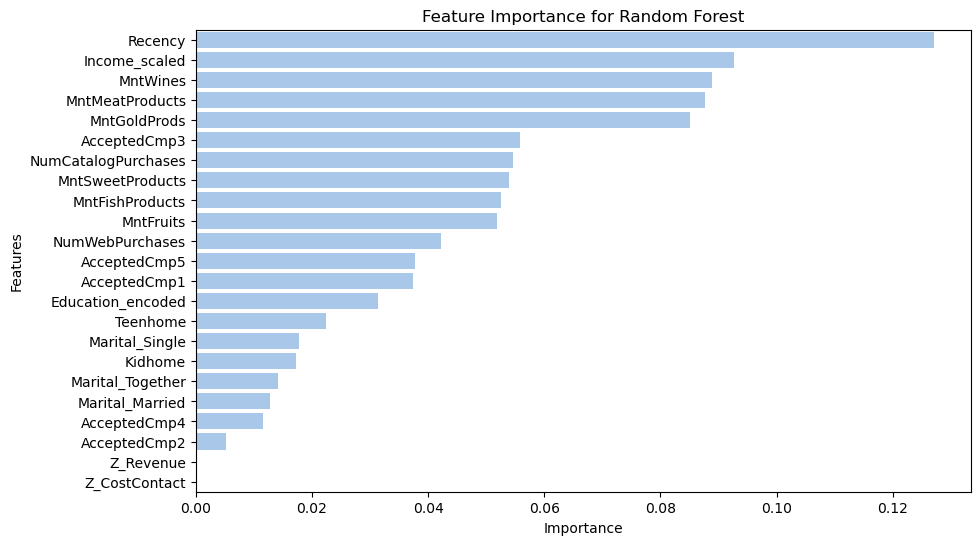

In [170]:
plt.figure(figsize = (10,6))
sns.barplot(x='importance', y = 'features', data = feature_importance, color='#9EC6F3')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### - XGBoost

In [93]:
#!pip install xgboost

#### Initial fit

In [95]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Instantiate model
xgb_clf = xgb.XGBClassifier(eval_metric='logloss') 

# Fit model
xgb_clf.fit(X_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       377
           1       0.59      0.51      0.54        67

    accuracy                           0.87       444
   macro avg       0.75      0.72      0.73       444
weighted avg       0.86      0.87      0.87       444



#### Grid search

In [97]:
params =  {
    'n_estimators': [100,200,300], 
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1], 
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0], 
    'gamma': [0,1], 
    'reg_alpha': [0, 0.1], 
    'reg_lambda': [1, 1.5],
}
grid_search = GridSearchCV(
    estimator = xgb_clf, 
    param_grid = params, 
    scoring = 'recall', 
    cv = 5, 
    verbose = 1, 
    n_jobs = -1
)

grid_search.fit(X_train_balanced, y_train_balanced)
print(grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\anish\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}


In [98]:
best_clf = grid_search.best_estimator_
y_pred_xgb_tune = best_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       377
           1       0.56      0.52      0.54        67

    accuracy                           0.87       444
   macro avg       0.74      0.73      0.73       444
weighted avg       0.86      0.87      0.86       444



#### Feature Importance

In [100]:
xg_imp = best_clf.feature_importances_
imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xg_imp}).sort_values(by='Importance',ascending=False)
print(imp_df)

                Feature  Importance
13         AcceptedCmp5    0.156731
14         AcceptedCmp1    0.156473
11         AcceptedCmp3    0.109040
21       Marital_Single    0.066192
15         AcceptedCmp2    0.062813
0               Kidhome    0.043266
12         AcceptedCmp4    0.042389
1              Teenhome    0.040190
2               Recency    0.036299
19    Education_encoded    0.032978
22     Marital_Together    0.028019
5       MntMeatProducts    0.027908
8          MntGoldProds    0.027283
9       NumWebPurchases    0.025404
10  NumCatalogPurchases    0.023563
18        Income_scaled    0.022906
3              MntWines    0.022755
7      MntSweetProducts    0.020967
20      Marital_Married    0.019966
4             MntFruits    0.018673
6       MntFishProducts    0.016184
17            Z_Revenue    0.000000
16        Z_CostContact    0.000000


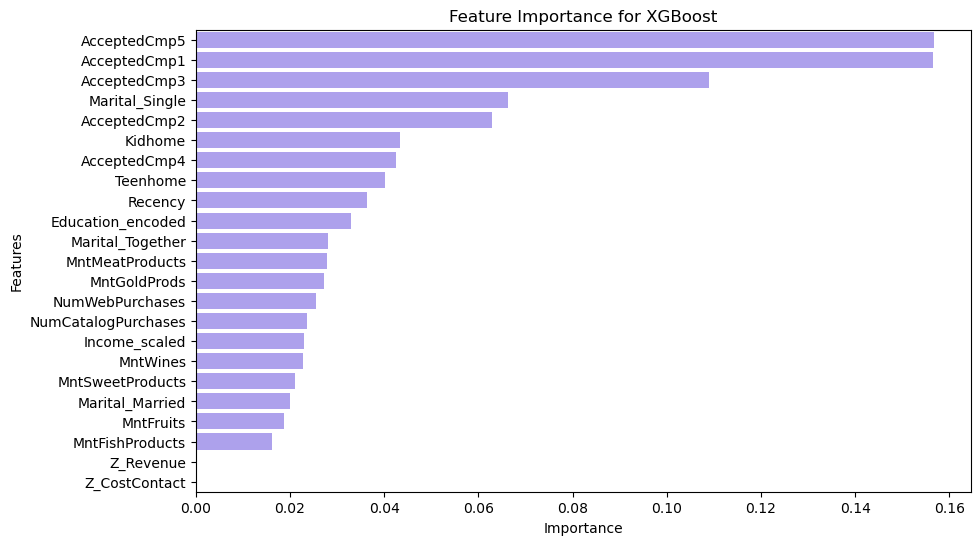

In [172]:
plt.figure(figsize = (10,6))
sns.barplot(x='Importance', y = 'Feature', data = imp_df,color='#A594F9')
plt.title("Feature Importance for XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Part 4: Modelling and Interpretation

In [174]:
#Choosing the most relevant features from Random Forest and XG Boost
# Final selected features (no duplicates)
#model
#logreg_features = [ 'Recency', 'MntWines', 'MntMeatProducts', 'MntGoldProds',   'Income_scaled', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'Marital_Single', 'AcceptedCmp2', 'Kidhome', 'AcceptedCmp4', 'Teenhome']
#other categories
logreg_features = [
    'Recency', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 
     'Income_scaled', 
    'Marital_Single', 'Kidhome',  'Teenhome', 'Education_encoded', 'NumWebPurchases','NumCatalogPurchases'
]

# Create new dataset
X_train_logreg = X_train_balanced[logreg_features]
X_test_logreg = X_test[logreg_features]

#### - Logistic Regression

In [176]:
pd.DataFrame(X_train_logreg)

,Recency,MntWines,MntMeatProducts,MntGoldProds,Income_scaled,Marital_Single,Kidhome,Teenhome,Education_encoded,NumWebPurchases,NumCatalogPurchases
1414,3,260,559,67,0.780904,0,0,0,4,4,6
1334,53,483,108,36,0.337410,0,1,1,4,11,1
1446,25,8,4,1,-0.618091,0,0,1,3,0,0
1855,48,918,118,21,0.598136,0,0,1,4,8,3
1475,35,19,17,2,-0.079459,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1765,36,1009,104,207,1.606345,0,0,0,2,9,8
1860,48,14,2,7,-0.597755,0,1,0,4,1,0
1353,48,130,16,5,-0.511531,0,1,1,3,3,1
1378,36,244,270,45,0.679416,0,0,0,3,1,3


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, classification_report,confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Train logreg on balanced data
logreg = LogisticRegression(max_iter=2000, random_state=42)  # Increase max_iter to ensure convergence
logreg.fit(X_train_logreg, y_train_balanced.ravel())

# Predictions
y_pred_log = logreg.predict(X_test_logreg)

# Model Evaluation

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_log))



Confusion matrix
[[274 103]
 [ 20  47]]


In [179]:
# accuracy, precision, recall, f1
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       377
           1       0.31      0.70      0.43        67

    accuracy                           0.72       444
   macro avg       0.62      0.71      0.62       444
weighted avg       0.84      0.72      0.76       444



#### - Convert to odds ratio for easy interpretation

In [184]:
# store names of the features
feature_names = X_train_logreg.columns

# take coefficients from the model
coefs = logreg.coef_[0]

# convert all coefs to odds ratio
odds_ratio = np.exp(coefs)

# create a dataframe to see features name with their odds ratio
odds_ratio_df = pd.DataFrame({
    'Features': feature_names, 
    'Coefficients': coefs, 
    'Odds Ratio': odds_ratio
})

#sort odds ratio 
or_df_sorted = odds_ratio_df.sort_values(by = "Odds Ratio", ascending = True).reset_index(drop=True)

print(or_df_sorted)


               Features  Coefficients  Odds Ratio
0              Teenhome     -0.829434    0.436296
1         Income_scaled     -0.432622    0.648806
2               Recency     -0.027854    0.972530
3       MntMeatProducts      0.000752    1.000752
4              MntWines      0.001415    1.001416
5          MntGoldProds      0.002558    1.002562
6       NumWebPurchases      0.135114    1.144667
7   NumCatalogPurchases      0.185270    1.203543
8     Education_encoded      0.367629    1.444306
9               Kidhome      0.892579    2.441419
10       Marital_Single      0.966376    2.628403


In [186]:
#check to see if they are statistically significant
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_logreg)
logit_model = sm.Logit(y_train_balanced, X_train_sm)
result = logit_model.fit()

# Access p-values with full precision
p_values = result.pvalues

print(p_values)


Optimization terminated successfully.
         Current function value: 0.522374
         Iterations 6
const                  8.388833e-24
Recency                5.072615e-65
MntWines               1.388249e-13
MntMeatProducts        5.746324e-03
MntGoldProds           6.425696e-03
Income_scaled          3.948730e-09
Marital_Single         3.197529e-21
Kidhome                7.922173e-16
Teenhome               5.069341e-18
Education_encoded      1.759002e-15
NumWebPurchases        1.442033e-10
NumCatalogPurchases    6.646091e-14
dtype: float64


In [188]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sort by absolute effect
or_df_sorted['abs_coef'] = or_df_sorted['Coefficients'].abs()
or_df_sorted = or_df_sorted.sort_values('abs_coef', ascending=True)

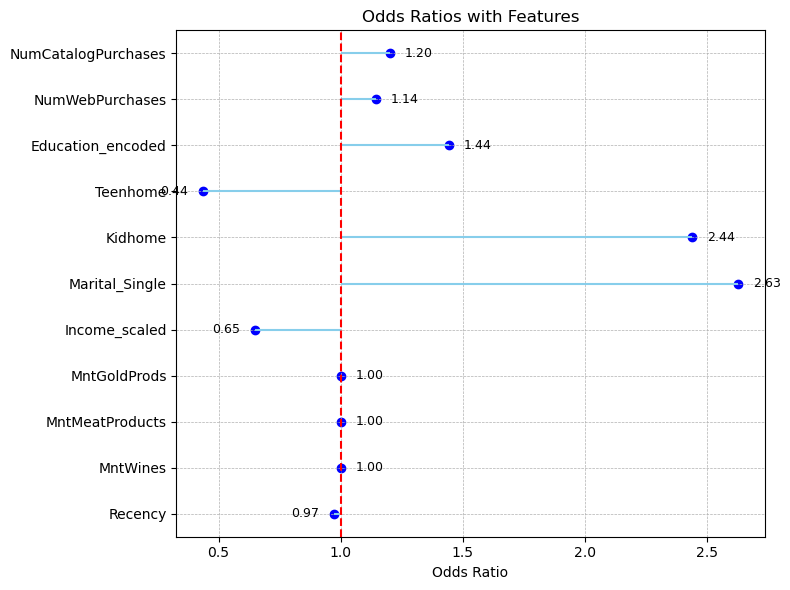

In [190]:
# odds ratio plot  
plt.figure(figsize=(8, 6))
plt.hlines(y=odds_ratio_df['Features'], xmin=1, xmax=odds_ratio_df['Odds Ratio'], color='skyblue')
plt.scatter(odds_ratio_df['Odds Ratio'], odds_ratio_df['Features'], color='blue')

offset = 0.06  # Adjust label to point distance
for idx, row in odds_ratio_df.iterrows():
    x_pos = row['Odds Ratio'] + offset if row['Odds Ratio'] >= 1 else row['Odds Ratio'] - offset
    ha = 'left' if row['Odds Ratio'] >= 1 else 'right'
    plt.text(x_pos, row['Features'], f"{row['Odds Ratio']:.2f}",
             va='center', ha=ha, fontsize=9, color='black')

plt.axvline(x=1, color='red', linestyle='--')  
plt.xlabel('Odds Ratio')
plt.title('Odds Ratios with Features')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()



#### Interpretation in this context of the dataset

Write here:


Teenhome:0.705564 ->Every additional teenager in the household reduces the odds of accepting the offer by about 29% </br>
Income_scaled:0.773182->Higher income reduces the odds slightly — each unit increase in scaled income decreases the odds of accepting the offer by about 23%. </br>
Recency: 0.973069->Each additional day since the last purchase slightly reduces the odds (about 2.7% decrease per day). </br>
MntWines: 1.001296->Each extra unit ($1?) spent on wine increases the odds very slightly (0.13%).</br>
MntMeatProducts:1.001886 ->Each extra unit spent on meat increases the odds very slightly (0.19%).</br>
MntGoldProds:1.003243-> Spending more on gold products increases odds slightly (~0.32%).</br>
Kidhome: 2.190857 ->Each additional child more than doubles the odds of accepting an offer (+119% increase).</br>
Marital_Single: 2.578621->Being single increases the odds by about 158% compared to being married or other statuses.</br>
AcceptedCmp4:2.678754 ->If the customer accepted the 4th campaign, they are 168% more likely to accept again.</br>
AcceptedCmp5: 2.686873 ->If accepted 5th campaign → 169% more likely to accept again.</br>
AcceptedCmp1: 2.903783 ->If accepted 1st campaign → 190% more likely.</br>
AcceptedCmp2: 3.182729 ->If accepted 2nd campaign → 218% more likely.</br>
AcceptedCmp3: 9.382383 ->If accepted 3rd campaign → more than 8x more likely to accept again.</br>

### Compare performance of different models

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate metrics
metrics =  {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'], 
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb_tune)],
    'Precision': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb_tune)], 
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb_tune)],
    'F1 score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb_tune)]
}
# create a DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.style

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.722973,0.313333,0.701493,0.433180
1,Random Forest,0.882883,0.682927,0.417910,0.518519
2,XGBoost,0.867117,0.564516,0.522388,0.542636
